# Project: Analysis of Medical Appointments in Brazil
## Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## 1. Introduction

> The dataset contains information of about a hundred and ten thousand medical appointments in Brazil, and its analysis is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row such as gender, age, etc. Furthermore, columns which require a 'Yes' or 'No' value use '1' and '0' respectively. It's also worth noting the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.
>
> The purpose of this analysis is to answer some questions which might help us determine which factors are associated with whether a patient show up for their scheduled appointment. Few of these questions include: 
>- Which day of the week has the highest number of patients?
>- How does the difference between schedule and appointment day affect the number of people who show up?
>- Which month has the highest number of patients that showed up?
>- Which neighbourhood do patients often visit?
>- Patients who receive one or more messages tend to show up more, true or false?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## 2. Data Wrangling 

### 2.1 General Properties

In [2]:
# laod dataset
medical_df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [3]:
medical_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# Are there duplicates in the dataset
sum(medical_df.duplicated())

0

In [5]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
medical_df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [7]:
type(medical_df.ScheduledDay[1])

str

From the summary of the dataset, some patients might have booked an appointment more than once. This explains why the number of unique ```PatientId``` is less than the total number of entries. Moreover, each appointment booked is associated with a unique id. 

There are 14 columns in the data set most of which are integer values. Also, there are no duplicates or missing values. However, the ```AppointmentID and ScheduledDay``` datatypes are interpreted as strings instead as datetime objects. We should convert them to a datetime datatype. This will enable us analyze the number of appointments on a monthly or daily basis.

In [8]:
medical_df.ScheduledDay.unique()

array(['2016-04-29T18:38:08Z', '2016-04-29T16:08:27Z',
       '2016-04-29T16:19:04Z', ..., '2016-04-27T16:03:52Z',
       '2016-04-27T15:09:23Z', '2016-04-27T13:30:56Z'], dtype=object)

In [9]:
medical_df.AppointmentDay.unique()

array(['2016-04-29T00:00:00Z', '2016-05-03T00:00:00Z',
       '2016-05-10T00:00:00Z', '2016-05-17T00:00:00Z',
       '2016-05-24T00:00:00Z', '2016-05-31T00:00:00Z',
       '2016-05-02T00:00:00Z', '2016-05-30T00:00:00Z',
       '2016-05-16T00:00:00Z', '2016-05-04T00:00:00Z',
       '2016-05-19T00:00:00Z', '2016-05-12T00:00:00Z',
       '2016-05-06T00:00:00Z', '2016-05-20T00:00:00Z',
       '2016-05-05T00:00:00Z', '2016-05-13T00:00:00Z',
       '2016-05-09T00:00:00Z', '2016-05-25T00:00:00Z',
       '2016-05-11T00:00:00Z', '2016-05-18T00:00:00Z',
       '2016-05-14T00:00:00Z', '2016-06-02T00:00:00Z',
       '2016-06-03T00:00:00Z', '2016-06-06T00:00:00Z',
       '2016-06-07T00:00:00Z', '2016-06-01T00:00:00Z',
       '2016-06-08T00:00:00Z'], dtype=object)

The data covers appointments from the 29th April 2016 to 8th June 2016.

In [10]:
medical_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The minimum ```age``` is -1? A person age cannot be less than 0! In the same vein, the ```Handcap``` column requires a true or false (0 or 1) answer, how then is the maximum equal to 4? The next section hopes to address these issues and other related outliers.

### 2.2 Data Cleaning 

#### 2.2.1 Rename Columns

Sometimes, it is better to work with all lower-case column names. I also prefer underscore to camelCase. This reduces the stress of having to lookup columns names. Lastly, there seems to be an incorrect spelling, 'hipertension'

In [11]:
# change all to lowercase
medical_df.columns = [column.lower() for column in medical_df.columns]
medical_df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show'],
      dtype='object')

In [12]:
# use underscores where necessary and correct spelling
labels = {'patientid':'patient_id', 'appointmentid':'appointment_id', 'appointmentday':'appointment_day', 
          'hipertension':'hypertension', 'scheduledday':'scheduled_day', 'no-show':'no_show'}
medical_df.rename(columns=labels, inplace=True)
medical_df

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


#### 2.2.2 Change Datatype

In [13]:
medical_df.scheduled_day = pd.to_datetime(medical_df.scheduled_day)
medical_df.appointment_day = pd.to_datetime(medical_df.appointment_day)
medical_df.dtypes

patient_id                     float64
appointment_id                   int64
gender                          object
scheduled_day      datetime64[ns, UTC]
appointment_day    datetime64[ns, UTC]
age                              int64
neighbourhood                   object
scholarship                      int64
hypertension                     int64
diabetes                         int64
alcoholism                       int64
handcap                          int64
sms_received                     int64
no_show                         object
dtype: object

#### 2.2.3 Check For Obvious Outliers

First off, we know that all unique values in ```scholarship``` to ```sms_received``` column should be **0 and 1**. In **Section 2.1** however, we observed that the ```handcap``` column has a maximum of 4. 
Secondly, we observed a rather impossible age, -1. This section addresses these issues by removing or modifying the outliers

In [14]:
medical_df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received',
       'no_show'],
      dtype='object')

In [15]:
# get all unique values in scholarship to sms_received column
pd.Series({column: medical_df[column].unique() for column in medical_df.columns[7:-1]})

scholarship              [0, 1]
hypertension             [1, 0]
diabetes                 [0, 1]
alcoholism               [0, 1]
handcap         [0, 1, 2, 3, 4]
sms_received             [0, 1]
dtype: object

In [16]:
# people with handcap value greater than 1
medical_df.query('handcap > 1')

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
946,7.282582e+13,5582483,M,2016-04-14 09:26:08+00:00,2016-04-29 00:00:00+00:00,94,BELA VISTA,0,1,1,0,2,1,No
1665,1.242919e+13,5525497,M,2016-03-30 09:16:41+00:00,2016-04-29 00:00:00+00:00,64,SANTA MARTHA,0,1,0,1,2,1,No
1666,1.242919e+13,5525498,M,2016-03-30 09:16:41+00:00,2016-04-29 00:00:00+00:00,64,SANTA MARTHA,0,1,0,1,2,0,No
2071,1.242919e+13,5640120,M,2016-04-29 10:08:48+00:00,2016-04-29 00:00:00+00:00,64,SANTA MARTHA,0,1,0,1,2,0,No
2091,1.491829e+13,5638626,F,2016-04-29 08:13:59+00:00,2016-04-29 00:00:00+00:00,11,ANDORINHAS,0,0,0,0,2,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108376,2.387212e+14,5756931,F,2016-06-01 08:48:28+00:00,2016-06-07 00:00:00+00:00,44,ROMÃO,0,1,1,0,2,1,No
109484,3.589495e+14,5752442,M,2016-05-31 11:45:57+00:00,2016-06-02 00:00:00+00:00,64,DA PENHA,0,1,1,0,2,0,No
109733,5.662976e+14,5772744,F,2016-06-03 16:11:00+00:00,2016-06-07 00:00:00+00:00,34,JUCUTUQUARA,0,0,0,0,2,1,No
109975,4.522185e+13,5766970,M,2016-06-02 16:07:36+00:00,2016-06-06 00:00:00+00:00,39,PRAIA DO SUÁ,1,0,0,0,2,1,No


According to the [description](https://www.kaggle.com/datasets/joniarroba/noshowappointments) of the data set from Kaggle, ```handcap``` column holds a binary value (true or false).  At first, I thought maybe a few rows contain handcap values not equal to one or zero and these are possibly outliers, but, one hundred and ninety-nine rows? This can't be a mistake. 

So, I checked comments from people who have also analyzed this data set and possibly faced the same problem, then I realized it wasn't a mistake. According to the data set creator's [comment](https://www.kaggle.com/datasets/joniarroba/noshowappointments/discussion/29699?search=handcap), 

"The handcap refers to the number of disabilities a person has. For example, if the person is blind and can't walk the total is 2. The problem is that patients with 1 handcap becomes unclear if this is blindness or anything else."

While this does not really give an in-depth knowledge, we know that at least we can keep the rows and ask the question: Do people with one or more disabilities show up more?

In [17]:
# check unique ages
medical_df.age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

In [18]:
medical_df.query('age < 0')

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


Since we have just a single obvious outlier, it will be most convenient to drop this row

In [19]:
medical_df.drop(99832, axis=0, inplace=True)

In [20]:
# confirm drop
medical_df.query('age < 0')

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show


#### 2.2.4 Create New Columns

- Which day of the week has the highest number of people that show up for their appointment?  
- Do people who book appointment early tend to show up more?  
- Which age category of people has the highest number of show up?

To answer the above questions and other related ones, we need to add three columns to our data set  
1. A column which contains the categorizes of people with respect to their age.
    >- Child - 0 to 9
    >- Adolescent - 10 to 19
    >- Young adult - 20 to 24
    >- Adult - 25 to 59
    >- old - greater than 60  
    
    > Age grouping reference:  
    >- [Adolescent](https://www.who.int/news-room/fact-sheets/detail/adolescents-health-risks-and-solutions)  
    >- [Young Adult](https://www.who.int/news-room/fact-sheets/detail/levels-and-trends-in-older-adolescent-%2815-to-19-years%29-and-young-adult-%2820-to-24-years%29-mortality)
2. The second column contains the difference between schedule and appointment time. This tells us how long till the patient's appointment.
3. Since we have converted our schedule and appointment columns from string to datetime datatype, we can extract the different parts of the data in separate columns. However, we can skip the year since the whole data set contains appointment in a single year 

In [21]:
#extract corresponding days
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
medical_df['appointment_weekday'] = medical_df['appointment_day'].dt.dayofweek.map(dayOfWeek)
medical_df.sample(20)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show,appointment_weekday
90835,2.637754e+14,5776402,F,2016-06-06 11:01:53+00:00,2016-06-06 00:00:00+00:00,73,SÃO PEDRO,0,0,1,0,0,0,No,Monday
17523,4.717658e+14,5693933,F,2016-05-13 07:52:40+00:00,2016-05-19 00:00:00+00:00,3,SÃO JOSÉ,0,0,0,0,0,0,No,Thursday
56169,9.132313e+13,5651841,M,2016-05-03 09:19:33+00:00,2016-05-04 00:00:00+00:00,63,REPÚBLICA,0,1,1,0,0,0,No,Wednesday
91902,9.349957e+13,5770443,M,2016-06-03 10:17:15+00:00,2016-06-08 00:00:00+00:00,3,TABUAZEIRO,0,0,0,0,0,1,Yes,Wednesday
44176,6.644426e+13,5713898,M,2016-05-18 10:55:33+00:00,2016-05-19 00:00:00+00:00,6,SÃO BENEDITO,0,0,0,0,0,0,No,Thursday
95053,6.682568e+12,5718212,F,2016-05-19 09:05:30+00:00,2016-06-06 00:00:00+00:00,11,ILHA DO PRÍNCIPE,0,0,0,0,0,1,Yes,Monday
44238,9.813392e+12,5688916,F,2016-05-12 07:48:57+00:00,2016-05-12 00:00:00+00:00,2,CONSOLAÇÃO,1,0,0,0,0,0,No,Thursday
30494,1.965262e+12,5639776,M,2016-04-29 09:34:36+00:00,2016-05-17 00:00:00+00:00,73,CENTRO,0,1,0,0,0,0,Yes,Tuesday
29366,4.456792e+12,5586359,F,2016-04-15 07:33:15+00:00,2016-05-02 00:00:00+00:00,44,CRUZAMENTO,0,0,0,0,0,1,No,Monday
84915,6.688981e+12,5789859,F,2016-06-08 15:54:45+00:00,2016-06-08 00:00:00+00:00,86,SANTA CLARA,0,1,0,0,0,0,No,Wednesday


In [22]:
#extract corresponding months
month={0:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 
           7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
medical_df['appointment_month'] = medical_df['appointment_day'].dt.month.map(month)
medical_df.sample(20)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show,appointment_weekday,appointment_month
57196,9.533754e+14,5574893,F,2016-04-12 16:09:27+00:00,2016-05-17 00:00:00+00:00,45,MARIA ORTIZ,0,0,0,0,0,0,No,Tuesday,May
34011,1.178787e+14,5658758,F,2016-05-04 11:46:42+00:00,2016-05-04 00:00:00+00:00,35,CONSOLAÇÃO,0,0,0,0,0,0,No,Wednesday,May
101138,4.718289e+12,5765946,F,2016-06-02 14:05:04+00:00,2016-06-02 00:00:00+00:00,54,PRAIA DO SUÁ,0,1,0,0,0,0,No,Thursday,June
83750,1.183946e+13,5668880,F,2016-05-06 09:53:48+00:00,2016-05-06 00:00:00+00:00,68,JARDIM CAMBURI,0,0,0,0,0,0,No,Friday,May
33060,9.142375e+12,5681036,F,2016-05-10 13:27:04+00:00,2016-05-10 00:00:00+00:00,73,BELA VISTA,0,0,0,0,0,0,No,Tuesday,May
14978,4.177846e+12,5724226,F,2016-05-20 09:12:08+00:00,2016-05-20 00:00:00+00:00,16,JESUS DE NAZARETH,0,0,0,0,0,0,No,Friday,May
35183,4.769881e+12,5608463,F,2016-04-20 13:52:15+00:00,2016-05-06 00:00:00+00:00,31,BENTO FERREIRA,0,0,0,0,0,1,No,Friday,May
28172,5.997127e+13,5637414,M,2016-04-29 06:49:43+00:00,2016-05-03 00:00:00+00:00,58,SANTA MARTHA,1,0,0,0,0,0,No,Tuesday,May
40031,2.624215e+13,5651228,F,2016-05-03 08:35:26+00:00,2016-05-03 00:00:00+00:00,35,RESISTÊNCIA,1,0,0,0,0,0,No,Tuesday,May
92118,9.818971e+13,5742588,F,2016-05-30 08:08:42+00:00,2016-06-02 00:00:00+00:00,51,ENSEADA DO SUÁ,0,0,0,0,0,1,No,Thursday,June


In [23]:
# get no of day(s) till appointment
days = (medical_df.appointment_day - medical_df.scheduled_day)
days

0        -1 days +05:21:52
1        -1 days +07:51:33
2        -1 days +07:40:56
3        -1 days +06:30:29
4        -1 days +07:52:37
                ...       
110522    34 days 14:44:25
110523    34 days 16:32:27
110524    40 days 07:56:08
110525    40 days 08:50:37
110526    40 days 10:29:04
Length: 110526, dtype: timedelta64[ns]

In [24]:
# extract the day from the timedelta[ns] dtype
days = days.astype('timedelta64[D]')
days

0         -1.0
1         -1.0
2         -1.0
3         -1.0
4         -1.0
          ... 
110522    34.0
110523    34.0
110524    40.0
110525    40.0
110526    40.0
Length: 110526, dtype: float64

In [25]:
# now check for unique values 
days.unique()

array([ -1.,   1.,   2.,   0.,   3.,   8.,  28.,   9.,  22.,  10.,  17.,
        16.,  13.,  27.,  23.,  20.,  14.,  15.,  21.,  42.,  29.,  30.,
        41.,  31.,  55.,  44.,  45.,  38.,  36.,  37.,  43.,  49.,  59.,
        51.,  52.,  64.,  66.,  90.,  65.,  83.,  77.,  86., 114., 108.,
        62.,  69.,  71.,  56.,  57.,  50.,  58.,  40.,  48.,  72.,  63.,
        19.,  32.,  33.,   5.,  34.,  35.,  11.,  12.,  39.,  46.,   7.,
         4.,   6.,  24.,  25.,  47.,  26.,  18.,  60.,  54.,  61., 175.,
        53.,  76.,  68.,  82.,  75.,  88.,  80., 102.,  78.,  67.,  74.,
        84., 111.,  -2.,  79.,  85.,  97.,  93., 141., 154., 161., 168.,
       103., 132., 124.,  95.,  87.,  89., 150., 125., 126., 110., 118.,
        73.,  70.,  81., 107., 109., 101., 121., 100., 104.,  91.,  96.,
        92., 106.,  94.,  -7., 138., 131., 178., 116., 145., 122.])

Seems there are three incorrect values: -2, -7 and -1  

In [26]:
# get the index of the rows with days equal -2
days[days == -2]

27033   -2.0
55226   -2.0
64175   -2.0
72362   -2.0
dtype: float64

In [27]:
# get the index of the rows with days equal -2
days[days == -7]

71533   -7.0
dtype: float64

In [28]:
#get all data in these rows
medical_df.iloc[[27033, 55226, 64175, 72362, 71533]]

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show,appointment_weekday,appointment_month
27033,7.839273e+12,5679978,M,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,Monday,May
55226,7.896294e+12,5715660,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,Tuesday,May
64175,2.425226e+13,5664962,F,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,Wednesday,May
72362,3.787482e+12,5655637,M,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,Yes,Tuesday,May
71533,9.982316e+14,5686628,F,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,Thursday,May


According to the [description](https://www.kaggle.com/datasets/joniarroba/noshowappointments?search=sms) of the columns on kaggle, a person has to register (scheduled day) before they can visit the doctor (appointment day). Thus, there is no way scheduled day can be greater than appointment day. It might be convenient to drop these rows.

In [29]:
medical_df.drop([27033, 55226, 64175, 72362, 71533], axis=0, inplace=True)
days.drop([27033, 55226, 64175, 72362, 71533], axis=0, inplace=True)

In [30]:
# confirm drop
days[days == -2]

Series([], dtype: float64)

In [31]:
# perform similar operation with days equal to -7

In [32]:
days[days == -7]

Series([], dtype: float64)

In [33]:
medical_df.iloc[[71533]]

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show,appointment_weekday,appointment_month
71537,2.147418e+14,5642215,F,2016-04-29 15:22:06+00:00,2016-05-05 00:00:00+00:00,76,SANTO ANTÔNIO,0,1,0,0,1,1,No,Thursday,May


In [34]:
days[days == -1]

0        -1.0
1        -1.0
2        -1.0
3        -1.0
4        -1.0
         ... 
110511   -1.0
110512   -1.0
110513   -1.0
110514   -1.0
110517   -1.0
Length: 38562, dtype: float64

This data is rather too large to be dropped. By checking a few rows, we might know what is going on.

In [35]:
medical_df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show,appointment_weekday,appointment_month
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,April
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,April
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,April
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,April
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,April


The issue came from the time zone. Since we are interested in the number of days before the appointment day, we can replace all -1s with 0. Also, we can ignore the hours associated with each day. Hence values such as -1 and 0 will be interpreted as: A patient has less than **24 hours (a day)** until their appointment taking account from the day they registered the appointment. 

In [36]:
days.replace(-1, 0, inplace=True)
medical_df['days_left'] = days
medical_df.sample(20)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show,appointment_weekday,appointment_month,days_left
85113,4.158258e+10,5781139,F,2016-06-07 09:05:15+00:00,2016-06-08 00:00:00+00:00,13,FORTE SÃO JOÃO,0,0,0,0,0,0,No,Wednesday,June,0.0
5005,6.923175e+13,5702493,M,2016-05-16 12:26:59+00:00,2016-05-19 00:00:00+00:00,66,JARDIM DA PENHA,0,0,0,0,0,0,No,Thursday,May,2.0
11810,4.217418e+13,5694191,F,2016-05-13 08:17:00+00:00,2016-05-18 00:00:00+00:00,59,SÃO JOSÉ,0,0,0,0,0,0,No,Wednesday,May,4.0
59185,6.974124e+14,5616148,F,2016-04-25 13:34:43+00:00,2016-05-03 00:00:00+00:00,32,DO QUADRO,0,0,0,0,0,1,No,Tuesday,May,7.0
91886,5.128233e+14,5756920,F,2016-06-01 08:47:35+00:00,2016-06-01 00:00:00+00:00,36,CONQUISTA,1,0,0,0,0,0,No,Wednesday,June,0.0
60250,9.197394e+10,5693277,M,2016-05-13 07:02:22+00:00,2016-05-13 00:00:00+00:00,2,FONTE GRANDE,0,0,0,0,0,0,No,Friday,May,0.0
8744,3.353478e+13,5676001,M,2016-05-09 14:49:31+00:00,2016-05-09 00:00:00+00:00,44,DA PENHA,0,0,0,1,0,0,No,Monday,May,0.0
44326,4.535886e+13,5457970,F,2016-03-11 10:33:15+00:00,2016-05-13 00:00:00+00:00,34,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,May,62.0
7725,6.264199e+12,5693047,M,2016-05-12 17:19:30+00:00,2016-05-12 00:00:00+00:00,59,JESUS DE NAZARETH,1,0,0,0,0,0,No,Thursday,May,0.0
104209,7.918515e+14,5774810,F,2016-06-06 08:42:31+00:00,2016-06-06 00:00:00+00:00,52,ITARARÉ,0,1,0,0,0,0,No,Monday,June,0.0


In [37]:
# define a function for age category
def age_category(row):
    age = row['age']
    if age >= 0 and age <= 9:
        return 'child'
    elif age >= 10 and age <= 19:
        return 'adolescent'
    elif age >= 20 and age <= 24:
        return 'young_adult'
    elif age >= 25 and age <=59:
        return 'adult'
    elif age >= 60:
        return 'old'

In [38]:
# create age_category column using the function above
medical_df['age_category'] = medical_df.apply(age_category, axis=1)

In [39]:
# confirm changes
medical_df

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show,appointment_weekday,appointment_month,days_left,age_category
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,April,0.0,old
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,April,0.0,adult
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,April,0.0,old
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,April,0.0,child
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,April,0.0,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No,Tuesday,June,34.0,adult
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No,Tuesday,June,34.0,adult
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No,Tuesday,June,40.0,young_adult
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No,Tuesday,June,40.0,adult


So far, we have performed the following operations on the data set:
1. Changed the ```scheduled_day``` and	```appointment_day``` columns to datetimes datatype. This will enable us answer questions associated with days or months.
2. Grouped people by age. This makes it easier to visualize age categories of patients.
3. Added a new column, ```days_left```. This variable means: the total number of days before the appointment day counting from the scheduled day.  
Up to this point, the dataset now contains 110521 rows and 18 columns

<a id='eda'></a>
## 3. Exploratory Data Analysis

> Before answering any question, it might be helpful to draw a few charts to get a glimpse of the relationship between and within columns.

In [40]:
medical_df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show,appointment_weekday,appointment_month,days_left,age_category
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,April,0.0,old
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,April,0.0,adult
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,April,0.0,old
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,April,0.0,child
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,April,0.0,adult


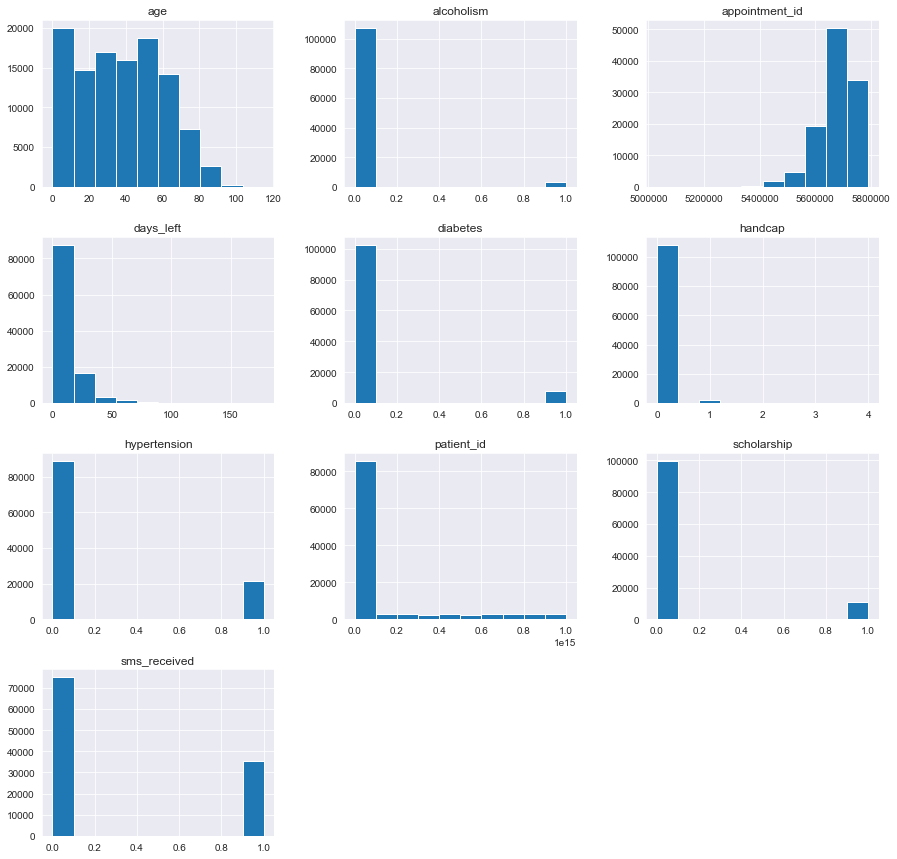

In [41]:
# distribution of data within columns
sns.set_style('darkgrid')
medical_df.hist(figsize=(15,15));

In [42]:
medical_df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received',
       'no_show', 'appointment_weekday', 'appointment_month', 'days_left',
       'age_category'],
      dtype='object')

A summary histogram tells us a lot about the data. By looking at the diagram, we can say that compared to the total population: 
>- Patients with diabetes are very low 
>- A lot of patients do not receive an SMS
>- Few patients are on the scholarship scheme
>- Very few patients drink alcohol
>- Patients with one or more handcap barely show up on the graph
>- There seems to a significant number of patients who have their appointment in less than a day.    

How do these characteristics determine whether a patient show up or not?
A scatter plot might not really help in this case because the no_show column contains a binary value. Perharps, bar charts, line plot and histograms might help.

### 3.1 Research Questions

### Q: Which gender  has the highest number of show-up?

In [43]:
# total number of male and female patients who showed up
show_up = medical_df.query('no_show == "No"')
gender_show_up = show_up.groupby('gender').count() 
gender_show_up

,patient_id,appointment_id,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show,appointment_weekday,appointment_month,days_left,age_category
gender,,,,,,,,,,,,,,,,,
F,57245,57245,57245,57245,57245,57245,57245,57245,57245,57245,57245,57245,57245,57245,57245,57245,57245
M,30962,30962,30962,30962,30962,30962,30962,30962,30962,30962,30962,30962,30962,30962,30962,30962,30962


In [44]:
percentage = gender_show_up.no_show / sum(gender_show_up.no_show)
print(f'{percentage[0]} of patients that showed up are females,')
print(f'while {percentage[1]} of patients are males')

0.6489847744510073 of patients that showed up are females,
while 0.3510152255489927 of patients are males


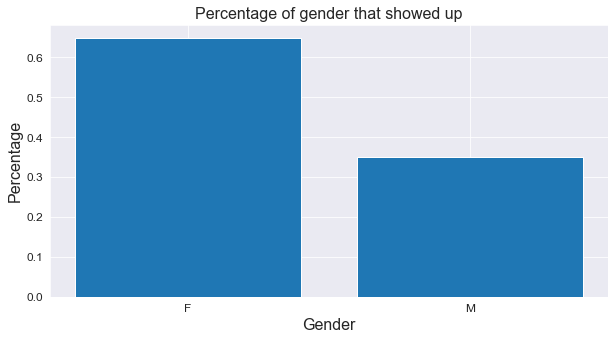

In [45]:
# A visualization of the percentage 
plt.figure(figsize=(10, 5))
plt.xlabel('Gender', fontsize=16)
plt.tick_params(labelsize=12)
plt.ylabel('Percentage', fontsize=16)
plt.title('Percentage of gender that showed up', fontsize=16)
plt.bar(gender_show_up.index, percentage, data=gender_show_up);

### Q: Which day of the week do people show up for their appointment most?

In [46]:
week_show_up = show_up.groupby('appointment_weekday').count()
week_show_up

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show,appointment_month,days_left,age_category
appointment_weekday,,,,,,,,,,,,,,,,,
Friday,14982,14982,14982,14982,14982,14982,14982,14982,14982,14982,14982,14982,14982,14982,14982,14982,14982
Monday,18024,18024,18024,18024,18024,18024,18024,18024,18024,18024,18024,18024,18024,18024,18024,18024,18024
Saturday,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
Thursday,13909,13909,13909,13909,13909,13909,13909,13909,13909,13909,13909,13909,13909,13909,13909,13909,13909
Tuesday,20488,20488,20488,20488,20488,20488,20488,20488,20488,20488,20488,20488,20488,20488,20488,20488,20488
Wednesday,20774,20774,20774,20774,20774,20774,20774,20774,20774,20774,20774,20774,20774,20774,20774,20774,20774


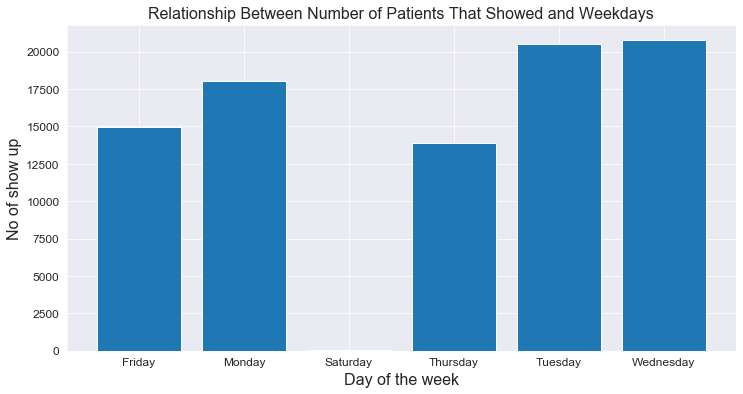

In [47]:
plt.figure(figsize=(12,6))
plt.xlabel('Day of the week', fontsize=16)
plt.ylabel('No of show up', fontsize=16)
plt.tick_params(labelsize=12)
plt.title('Relationship Between Number of Patients That Showed and Weekdays', fontsize=16)
plt.bar(week_show_up.index, week_show_up.no_show);

In [48]:
medical_df.groupby(['appointment_weekday', 'age_category']).count().no_show

appointment_weekday  age_category
Friday               adolescent       2354
                     adult            8855
                     child            2970
                     old              3674
                     young_adult      1166
Monday               adolescent       2467
                     adult           10672
                     child            3880
                     old              4342
                     young_adult      1352
Saturday             adolescent          1
                     adult              23
                     old                14
                     young_adult         1
Thursday             adolescent       2026
                     adult            8231
                     child            2684
                     old              3285
                     young_adult      1020
Tuesday              adolescent       2952
                     adult           12095
                     child            3966
                    

### Q: Which age category of patients is associated with the highest number of show up?

In [49]:
# age categories of people who showed up 
age_category_show = show_up.groupby('age_category').count().no_show
age_category_show

age_category
adolescent      9679
adult          41475
child          13991
old            17931
young_adult     5131
Name: no_show, dtype: int64

In [50]:
# percentage of people who showed up
percentage_show = age_category_show / age_category_show.sum()
percentage_show

age_category
adolescent     0.109731
adult          0.470201
child          0.158616
old            0.203283
young_adult    0.058170
Name: no_show, dtype: float64

In [51]:
# categories of people who do not show up 
did_not_show_up = medical_df.query('no_show == "Yes"')
age_category_no_show = did_not_show_up.groupby('age_category').count().no_show
age_category_no_show

age_category
adolescent      3256
adult          10610
child           3483
old             3241
young_adult     1724
Name: no_show, dtype: int64

In [52]:
# percentage of people who do not show up
percentage_no_show = age_category_no_show / age_category_no_show.sum()
percentage_no_show

age_category
adolescent     0.145917
adult          0.475486
child          0.156090
old            0.145245
young_adult    0.077261
Name: no_show, dtype: float64

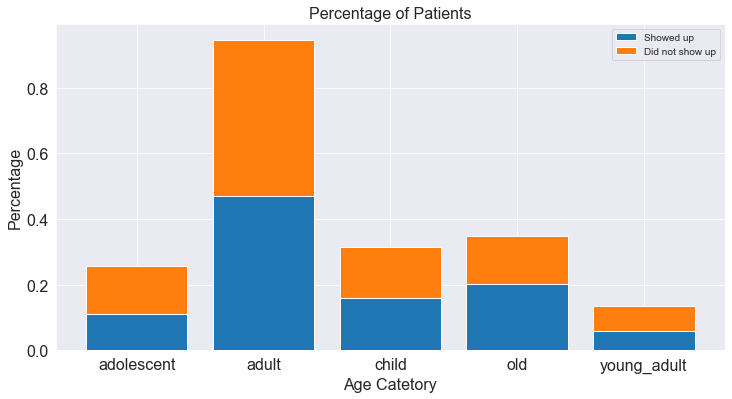

In [53]:
plt.figure(figsize=(12,6))
plt.xlabel('Age Catetory', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.title('Percentage of Patients', fontsize=16)
plt.tick_params(labelsize=16)
plt.bar(percentage_show.index, percentage_show) 
plt.bar(percentage_no_show.index, percentage_no_show, bottom=percentage_show);
plt.legend(['Showed up', 'Did not show up']);

A high percentage of patients who showed up and did not show up are adults. Perhaps, this is because majority of the population are adults (people whose age lie between 25 to 59 years).

### Q: How does the number of show up change over time?

In [54]:
# total number of people that showed up each month
month_show = show_up.groupby(['appointment_month']).count()
month_show['no_show']

appointment_month
April     2602
June     21568
May      64037
Name: no_show, dtype: int64

In [55]:
# total number of people that do not show up each month
month_no_show = did_not_show_up.groupby(['appointment_month']).count()
month_no_show['no_show']

appointment_month
April      633
June      4882
May      16799
Name: no_show, dtype: int64

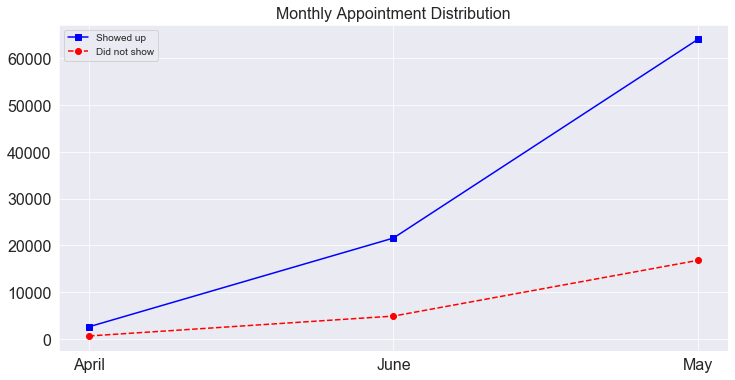

In [56]:
plt.figure(figsize=(12,6))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.plot(month_show.index, month_show['no_show'], 's-b');
plt.plot(month_no_show.index, month_no_show['no_show'], 'o--r');
plt.title('Monthly Appointment Distribution', fontsize=16);
plt.legend(['Showed up', 'Did not show']);

### Q: Do people who receive one or more messages tend to show up?

In [57]:
sms_messages_show = show_up.groupby('sms_received').count()
sms_messages_show

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,no_show,appointment_weekday,appointment_month,days_left,age_category
sms_received,,,,,,,,,,,,,,,,,
0,62509,62509,62509,62509,62509,62509,62509,62509,62509,62509,62509,62509,62509,62509,62509,62509,62509
1,25698,25698,25698,25698,25698,25698,25698,25698,25698,25698,25698,25698,25698,25698,25698,25698,25698


In [58]:
sms_messages_no_show = did_not_show_up.groupby('sms_received').count()
sms_messages_no_show

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,no_show,appointment_weekday,appointment_month,days_left,age_category
sms_received,,,,,,,,,,,,,,,,,
0,12530,12530,12530,12530,12530,12530,12530,12530,12530,12530,12530,12530,12530,12530,12530,12530,12530
1,9784,9784,9784,9784,9784,9784,9784,9784,9784,9784,9784,9784,9784,9784,9784,9784,9784


Let's take a moment to review this. Naturally, people, well at least myself, who are notified about a certain event have higher probability to attend. However, the reverse is the case here. So I checked if someone came across the same issue. The answer is yes. The dataset is somehow inconsistent. Here's a few comment about the data set  
[Is the Handcap and SMS_received columns swapped?](https://www.kaggle.com/datasets/joniarroba/noshowappointments/discussion/202717?search=sms)  
[Clarification of Sms_reminder column](https://www.kaggle.com/datasets/joniarroba/noshowappointments/discussion/46024?search=sms)

What if the encoding of this column is:  
'0' implies that patients receive more than one sms and '1' implies that they receive none. We can't make that assumption. Hence, we will not make draw any conclusion from this column. We should drop it then

In [59]:
medical_df.drop('sms_received', axis=1, inplace=True)
medical_df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handcap', 'no_show',
       'appointment_weekday', 'appointment_month', 'days_left',
       'age_category'],
      dtype='object')

### Q:  Do patients with longer appointment time later show up?

In [60]:
# number of patients that showed up
show_up.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show,appointment_weekday,appointment_month,days_left,age_category
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,April,0.0,old
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,April,0.0,adult
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,April,0.0,old
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,April,0.0,child
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,April,0.0,adult


In [61]:
dt = medical_df.groupby(['days_left'])
dt.no_show.count()

days_left
0.0      43775
1.0       6725
2.0       2737
3.0       5290
4.0       3277
         ...  
154.0       10
161.0       11
168.0        8
175.0       16
178.0       10
Name: no_show, Length: 128, dtype: int64

In [62]:
# group by days left
group_show = show_up.groupby('days_left', as_index=False).count()
group_show = group_show.loc[:, ['no_show', 'days_left']]
group_show

,no_show,days_left
0,40870,0.0
1,5123,1.0
2,2093,2.0
3,4059,3.0
4,2405,4.0
...,...,...
118,4,154.0
119,9,161.0
120,7,168.0
121,10,175.0


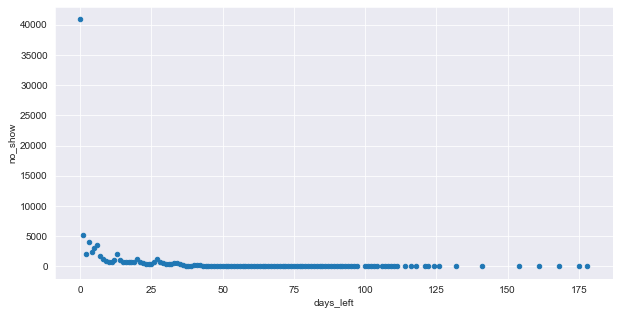

In [63]:
group_show.plot(x='days_left', y='no_show', kind='scatter', figsize=(10,5));

We can deduce that patients given an appointment in less than 24 hours tend to show up the most. The margin is just so huge compared to other days. Also, the number of patients that showed up decreases as appointment day increases. This means patients whose appointments are far away might not show up.  

### Q: Which neighbourhood do patients often visit?

In [64]:
medical_df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,no_show,appointment_weekday,appointment_month,days_left,age_category
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,No,Friday,April,0.0,old
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,No,Friday,April,0.0,adult
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,No,Friday,April,0.0,old
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,No,Friday,April,0.0,child
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,No,Friday,April,0.0,adult


In [65]:
# patients per neighbourhood
neighbourhood_show = show_up.groupby('neighbourhood', as_index=False).count()
neighbourhood_show = neighbourhood_show.loc[:, ['neighbourhood', 'no_show']]
neighbourhood_show

,neighbourhood,no_show
0,AEROPORTO,7
1,ANDORINHAS,1741
2,ANTÔNIO HONÓRIO,221
3,ARIOVALDO FAVALESSA,220
4,BARRO VERMELHO,332
...,...,...
75,SÃO JOSÉ,1549
76,SÃO PEDRO,1933
77,TABUAZEIRO,2559
78,UNIVERSITÁRIO,120


In [66]:
# Using proportion
neighbourhood_show['no_show'] = neighbourhood_show['no_show'] / neighbourhood_show['no_show'].sum()
neighbourhood_show

,neighbourhood,no_show
0,AEROPORTO,0.000079
1,ANDORINHAS,0.019738
2,ANTÔNIO HONÓRIO,0.002505
3,ARIOVALDO FAVALESSA,0.002494
4,BARRO VERMELHO,0.003764
...,...,...
75,SÃO JOSÉ,0.017561
76,SÃO PEDRO,0.021914
77,TABUAZEIRO,0.029011
78,UNIVERSITÁRIO,0.001360


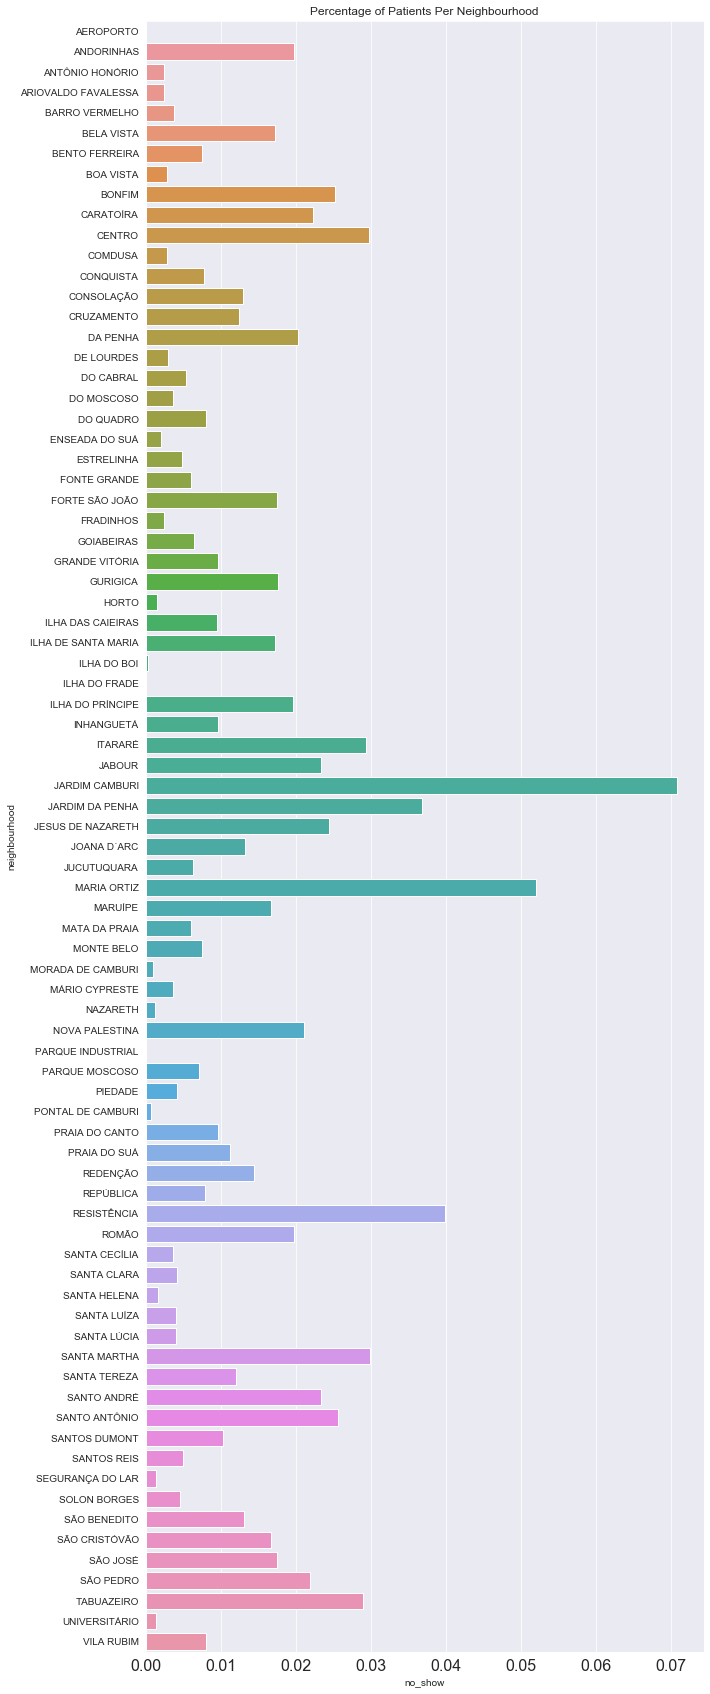

In [67]:
plt.figure(figsize=(10,30))
plt.xticks(fontsize=16)
plt.yticks(fontsize=10)
plt.title('Percentage of Patients Per Neighbourhood')
sns.barplot('no_show', 'neighbourhood', data=neighbourhood_show);

JARDIM CAMBURI neighbourhood has the highest number of visitations. About 7 perent of patients visit this neighbourhood 

### Q: Diabetic or  hypertensive patients tend to show up more, true or false?

In [68]:
# patients who are diabetic
diabetic = medical_df.query('diabetes == 1')
diabetic = diabetic.groupby('no_show').count()
diabetic

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,appointment_weekday,appointment_month,days_left,age_category
no_show,,,,,,,,,,,,,,,,
No,6513,6513,6513,6513,6513,6513,6513,6513,6513,6513,6513,6513,6513,6513,6513,6513
Yes,1430,1430,1430,1430,1430,1430,1430,1430,1430,1430,1430,1430,1430,1430,1430,1430


Majority of patients who diabetic showed up. 

In [69]:
# corresponding proportion
proportion_diabetic = diabetic / diabetic.sum()
proportion_diabetic 

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,appointment_weekday,appointment_month,days_left,age_category
no_show,,,,,,,,,,,,,,,,
No,0.819967,0.819967,0.819967,0.819967,0.819967,0.819967,0.819967,0.819967,0.819967,0.819967,0.819967,0.819967,0.819967,0.819967,0.819967,0.819967
Yes,0.180033,0.180033,0.180033,0.180033,0.180033,0.180033,0.180033,0.180033,0.180033,0.180033,0.180033,0.180033,0.180033,0.180033,0.180033,0.180033


Since all proportions are equal, we can pick any arbitrary column

In [70]:
proportion_diabetic = diabetic / diabetic.sum()
proportion_diabetic = proportion_diabetic.gender
proportion_diabetic

no_show
No     0.819967
Yes    0.180033
Name: gender, dtype: float64

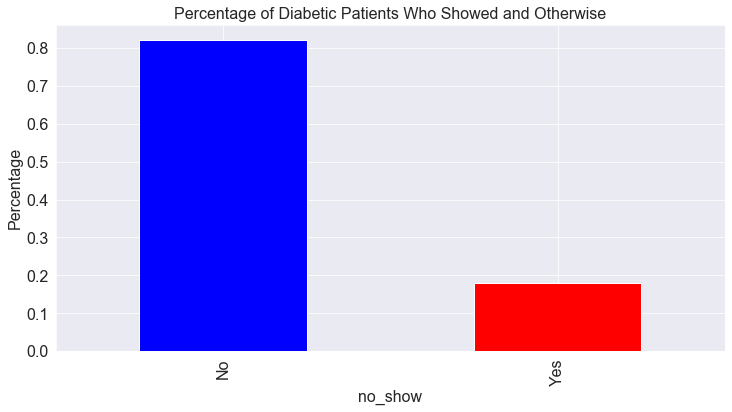

In [71]:
plt.figure(figsize=(12,6))
colors = ['blue', 'red']
plt.xlabel('Diabetic', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.tick_params(labelsize=16)
plt.title('Percentage of Diabetic Patients Who Showed and Otherwise', fontsize=16)
proportion_diabetic.plot(kind='bar', color=colors);

About 82 percent of diabetic patients showed up and 18 percent do not

In [72]:
# number of patients who are hypertensive
hypertensive = medical_df.query('hypertension == 1')
hypertensive = hypertensive.groupby('no_show').count()
hypertensive

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,appointment_weekday,appointment_month,days_left,age_category
no_show,,,,,,,,,,,,,,,,
No,18029,18029,18029,18029,18029,18029,18029,18029,18029,18029,18029,18029,18029,18029,18029,18029
Yes,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772


A lot of patients who are hypertensive showed up for their appointment

In [73]:
proportion_hypertensive = hypertensive / hypertensive.sum()
proportion_hypertensive

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,appointment_weekday,appointment_month,days_left,age_category
no_show,,,,,,,,,,,,,,,,
No,0.82698,0.82698,0.82698,0.82698,0.82698,0.82698,0.82698,0.82698,0.82698,0.82698,0.82698,0.82698,0.82698,0.82698,0.82698,0.82698
Yes,0.17302,0.17302,0.17302,0.17302,0.17302,0.17302,0.17302,0.17302,0.17302,0.17302,0.17302,0.17302,0.17302,0.17302,0.17302,0.17302


Since all proportions are equal, we can pick any arbitrary column

In [74]:
proportion_hypertensive = hypertensive / hypertensive.sum()
proportion_hypertensive = proportion_hypertensive.gender
proportion_hypertensive

no_show
No     0.82698
Yes    0.17302
Name: gender, dtype: float64

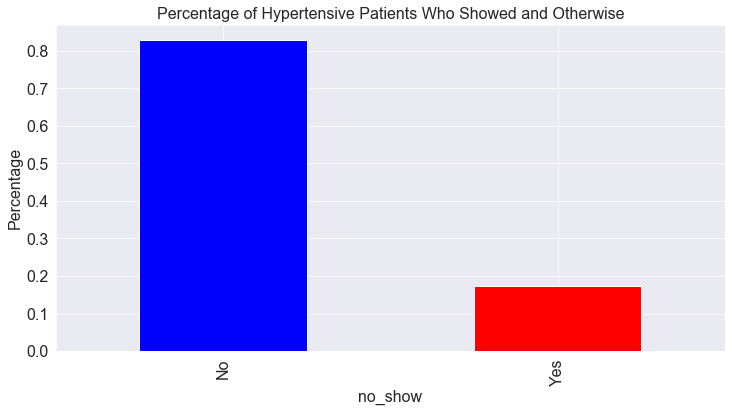

In [75]:
plt.figure(figsize=(12,6))
colors = ['blue', 'red']
plt.xlabel('Hypertensive', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.tick_params(labelsize=16)
plt.title('Percentage of Hypertensive Patients Who Showed and Otherwise', fontsize=16)
proportion_hypertensive.plot(kind='bar', color=colors);

About 83 percent of patients who showed up are hypertensive and 17 percent are not

### Do patients who book appointment for the first time show up more?

**In section 2.1**, we pointed out that the number of unique values in the ```patient_id``` is less than the total number of entries. However, values in ```appointment_id``` are all unique. This means that, some patients book appointments more than once. We are concerned with whether patients who book appointment for the first time showed up more than those who are not first timers.  

In [76]:
# index of all first timers in the general data 
unique = medical_df.groupby(['patient_id'], as_index=False).count()
unique = unique.query('appointment_id == 1')
index = unique.index
index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     9,    10,
               11,
            ...
            62281, 62285, 62286, 62288, 62289, 62292, 62294, 62295, 62296,
            62297],
           dtype='int64', length=37920)

In [77]:
patients = medical_df.iloc[index]
patients

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,no_show,appointment_weekday,appointment_month,days_left,age_category
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,No,Friday,April,0.0,old
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,No,Friday,April,0.0,adult
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,No,Friday,April,0.0,old
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,No,Friday,April,0.0,child
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,No,Friday,April,0.0,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62294,6.696427e+12,5690579,M,2016-05-12 10:18:12+00:00,2016-05-12 00:00:00+00:00,32,JABOUR,0,0,0,0,0,No,Thursday,May,0.0,adult
62296,9.885221e+13,5546220,M,2016-04-05 15:38:38+00:00,2016-05-05 00:00:00+00:00,74,JABOUR,0,0,0,0,0,No,Thursday,May,29.0,old
62297,9.334350e+13,5680297,F,2016-05-10 11:39:03+00:00,2016-05-12 00:00:00+00:00,57,JABOUR,0,0,0,0,0,No,Thursday,May,1.0,adult
62298,1.389878e+13,5597328,F,2016-04-18 16:13:39+00:00,2016-05-19 00:00:00+00:00,43,JABOUR,0,0,0,0,0,No,Thursday,May,30.0,adult


In [78]:
# patients who showed up for the first time
first_timers = patients.groupby('no_show').count()
first_timers

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,appointment_weekday,appointment_month,days_left,age_category
no_show,,,,,,,,,,,,,,,,
No,29785,29785,29785,29785,29785,29785,29785,29785,29785,29785,29785,29785,29785,29785,29785,29785
Yes,8135,8135,8135,8135,8135,8135,8135,8135,8135,8135,8135,8135,8135,8135,8135,8135


In [79]:
proportion_first_timers = first_timers / first_timers.sum()
proportion_first_timers = proportion_first_timers.gender
proportion_first_timers

no_show
No     0.785469
Yes    0.214531
Name: gender, dtype: float64

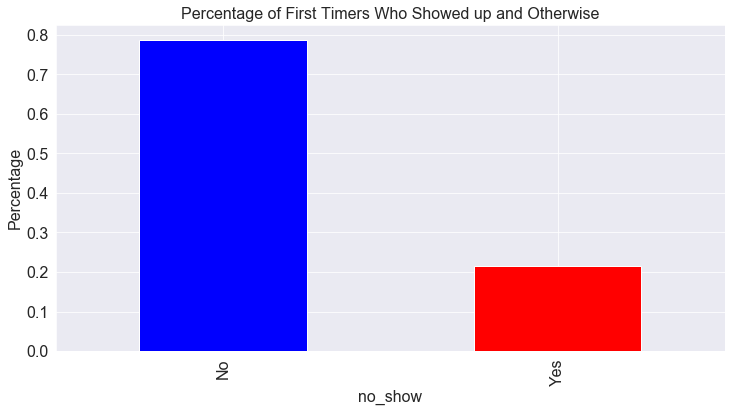

In [80]:
plt.figure(figsize=(12,6))
colors = ['blue', 'red']
plt.xlabel('First Timers', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.tick_params(labelsize=16)
plt.title('Percentage of First Timers Who Showed up and Otherwise', fontsize=16)
proportion_first_timers.plot(kind='bar', color=colors);

<a id='conclusions'></a>
## 4. Conclusions

### 4.1 About the dataset

> The data set contains a lot of binary value columns. Hence, conclusions and visualizations are mostly tailored around 'frequency' and 'proportions'. The data set is also inconsistent as a lot of [issues](https://www.kaggle.com/datasets/joniarroba/noshowappointments/discussion) were raised regarding the description of some columns. We had to drop a column due to some of these inconsistencies.   
I think the data has been modified over the years judging by the [questions](https://www.kaggle.com/datasets/joniarroba/noshowappointments/discussion) asked by other people. We cannot be a hundred percent sure changes would not be made to the data in the nearest days and this might be a limitation


### 4.2 Summary of findings

From the result of our analysis and visualizations 
>- About 65 percent of patients who showed up for their appointments are females while 35 percent are males  
>- The data covers appointments from the 29th April 2016 to 8th June 2016. Over this period, majority of patients showed up on Wednesday and Tuesday with Saturday being the least
>- Majority of the patients are adults (people whose age lie between 25 to 59 years). About 47 percent of people who showed up are adults, 20 percent are old people (60 and above). 11 percent are adolescents (10 to 19 years), 16 percent are children (0 to 9 years) and 6 percent are young adults (20 to 24 years). 
>- While some patients showed up more than once, more than 60 thousand visit was recorded in the month of May. 
>- Patients whose appointment day is in less than 24 hours showed up the most.
>- JARDIM CAMBURI neighbourhood has the highest number of visitations. About 7 percent of patients visit this neighbourhood.
>- About 82 percent of diabetic patients showed up and 18 percent do not
>- About 83 percent of patients who showed up are hypertensive and 17 percent are not
>- 37,920 patients booked an appointment for the first time. However, 79 percent showed up and 21 percent did not.

### 4.3 Future improvement

> The purpose of this analysis is to answer some questions which might help us determine which factors are associated with whether a patient show up for their scheduled appointment. Here, we analyzed using frequency and proportion. These of course cannot be efficient if we need to exhaustively determine all factors. Finally, too many binary columns limit the use of statistical functionality. Consistency in values and addition of a few non binary columns might also change the structure of the analysis. This would lead to drawing valid conclusions and making better predictions. 